In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as plty
from sklearn.preprocessing import StandardScaler,LabelEncoder,OrdinalEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,classification_report ,roc_auc_score,confusion_matrix
import warnings
warnings.filterwarnings("ignore")

1.Loading the datsets

In [108]:
df=pd.read_csv(r"C:\Users\USER\Documents\glass.csv")

In [109]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
df.tail()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1.0


In [112]:
df.shape

(999, 10)

In [113]:
df.value_counts()

RI       Na     Mg    Al    Si     K     Ca     Ba    Fe    Type
1.52213  14.21  3.82  0.47  71.77  0.11  9.57   0.00  0.00  1.0     2
1.51131  13.69  3.20  1.81  72.81  1.76  5.43   1.19  0.00  7.0     1
1.51215  12.99  3.47  1.12  72.98  0.62  8.35   0.00  0.31  1.0     1
1.51299  14.40  1.74  1.54  74.55  0.00  7.59   0.00  0.00  6.0     1
1.51115  17.38  0.00  0.34  75.41  0.00  6.65   0.00  0.00  6.0     1
                                                                   ..
1.52725  13.80  3.15  0.66  70.57  0.08  11.64  0.00  0.00  2.0     1
1.52739  11.02  0.00  0.75  73.08  0.00  14.96  0.00  0.00  2.0     1
1.52777  12.64  0.00  0.67  72.02  0.06  14.40  0.00  0.00  2.0     1
1.53125  10.73  0.00  2.10  69.81  0.58  13.30  3.15  0.28  2.0     1
1.53393  12.30  0.00  1.00  70.16  0.12  16.19  0.00  0.24  2.0     1
Name: count, Length: 213, dtype: int64

2.Exploratory data analysis

In [114]:
df.isnull().sum()

RI      785
Na      785
Mg      785
Al      785
Si      785
K       785
Ca      785
Ba      785
Fe      785
Type    785
dtype: int64

In [115]:
df.duplicated().sum()

np.int64(785)

below codes shows the percentage of ,missing values present in the data based on the percentage of missing values we are going to decide whether to use imputation or dropping methods 

In [116]:
df.isnull().mean()*100

RI      78.578579
Na      78.578579
Mg      78.578579
Al      78.578579
Si      78.578579
K       78.578579
Ca      78.578579
Ba      78.578579
Fe      78.578579
Type    78.578579
dtype: float64

here the missing value percentage is very high so thats imputing it does not make sense if we are imputed it increases the bias so thats why we are dropping the missing data

In [117]:
import pandas as pd
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(strategy='mean')
df[df.columns] = mean_imputer.fit_transform(df)

In [118]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.521010,13.64000,4.490000,1.100000,71.780000,0.060000,8.750000,0.000000,0.000000,1.000000
1,1.517610,13.89000,3.600000,1.360000,72.730000,0.480000,7.830000,0.000000,0.000000,1.000000
2,1.516180,13.53000,3.550000,1.540000,72.990000,0.390000,7.780000,0.000000,0.000000,1.000000
3,1.517660,13.21000,3.690000,1.290000,72.610000,0.570000,8.220000,0.000000,0.000000,1.000000
4,1.517420,13.27000,3.620000,1.240000,73.080000,0.550000,8.070000,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...
994,1.518365,13.40785,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
995,1.518365,13.40785,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
996,1.518365,13.40785,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
997,1.518365,13.40785,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374


In [119]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [120]:
df.drop_duplicates(inplace=True,ignore_index=True)

In [121]:
df[df.duplicated(keep=False)]


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type


In [122]:
df.duplicated().sum()

np.int64(0)

In [123]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.521010,13.64000,4.490000,1.100000,71.780000,0.060000,8.750000,0.000000,0.000000,1.000000
1,1.517610,13.89000,3.600000,1.360000,72.730000,0.480000,7.830000,0.000000,0.000000,1.000000
2,1.516180,13.53000,3.550000,1.540000,72.990000,0.390000,7.780000,0.000000,0.000000,1.000000
3,1.517660,13.21000,3.690000,1.290000,72.610000,0.570000,8.220000,0.000000,0.000000,1.000000
4,1.517420,13.27000,3.620000,1.240000,73.080000,0.550000,8.070000,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...
209,1.516850,14.92000,0.000000,1.990000,73.060000,0.000000,8.400000,1.590000,0.000000,7.000000
210,1.520650,14.36000,0.000000,2.020000,73.420000,0.000000,8.440000,1.640000,0.000000,7.000000
211,1.516510,14.38000,0.000000,1.940000,73.610000,0.000000,8.480000,1.570000,0.000000,7.000000
212,1.517110,14.23000,0.000000,2.080000,73.360000,0.000000,8.620000,1.670000,0.000000,7.000000


In [124]:
df.describe

<bound method NDFrame.describe of            RI        Na        Mg        Al         Si         K        Ca  \
0    1.521010  13.64000  4.490000  1.100000  71.780000  0.060000  8.750000   
1    1.517610  13.89000  3.600000  1.360000  72.730000  0.480000  7.830000   
2    1.516180  13.53000  3.550000  1.540000  72.990000  0.390000  7.780000   
3    1.517660  13.21000  3.690000  1.290000  72.610000  0.570000  8.220000   
4    1.517420  13.27000  3.620000  1.240000  73.080000  0.550000  8.070000   
..        ...       ...       ...       ...        ...       ...       ...   
209  1.516850  14.92000  0.000000  1.990000  73.060000  0.000000  8.400000   
210  1.520650  14.36000  0.000000  2.020000  73.420000  0.000000  8.440000   
211  1.516510  14.38000  0.000000  1.940000  73.610000  0.000000  8.480000   
212  1.517110  14.23000  0.000000  2.080000  73.360000  0.000000  8.620000   
213  1.518365  13.40785  2.684533  1.444907  72.650935  0.497056  8.956963   

           Ba        Fe      

In [125]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518348,13.404102,2.679227,1.449462,72.655051,0.498865,8.954098,0.175865,0.057276,2.788693
std,0.003026,0.814743,1.440298,0.494760,0.772179,0.651650,1.422531,0.497074,0.097360,2.100182
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.290000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.365000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519140,13.807500,3.600000,1.630000,73.087500,0.610000,9.147500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


<Axes: >

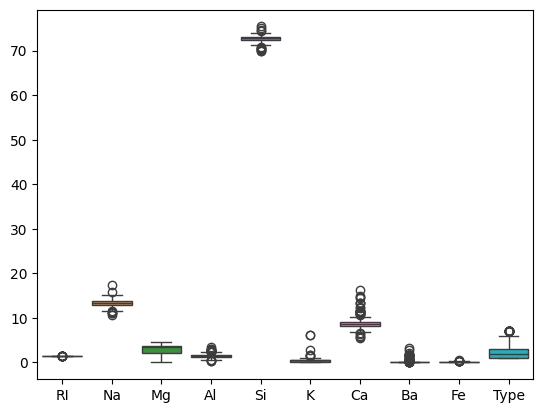

In [126]:
sns.boxplot(df)

In [127]:
def outlier_capping(df,column):
    q1=df[column].quantile(0.25)
    q3=df[column].quantile(0.75)
    iqr=q3-q1
    lower_extream=q1-1.5*iqr
    upper_extream=q3+1.5*iqr
    df[column]=df[column].apply(lambda x: lower_extream if x<lower_extream else upper_extream if x>upper_extream else x)
for col in df.select_dtypes(["int","float"]).columns:
    outlier_capping(df,col)

<Axes: >

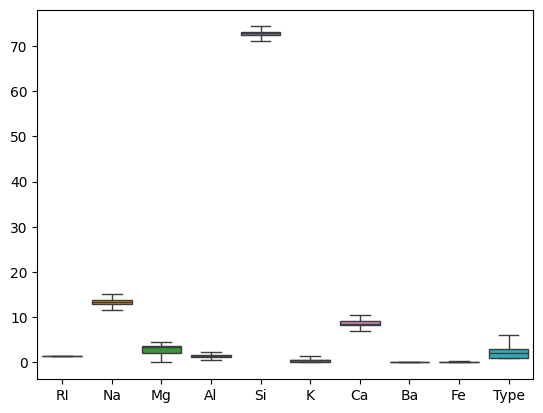

In [128]:
sns.boxplot(df)

2.data visualizations

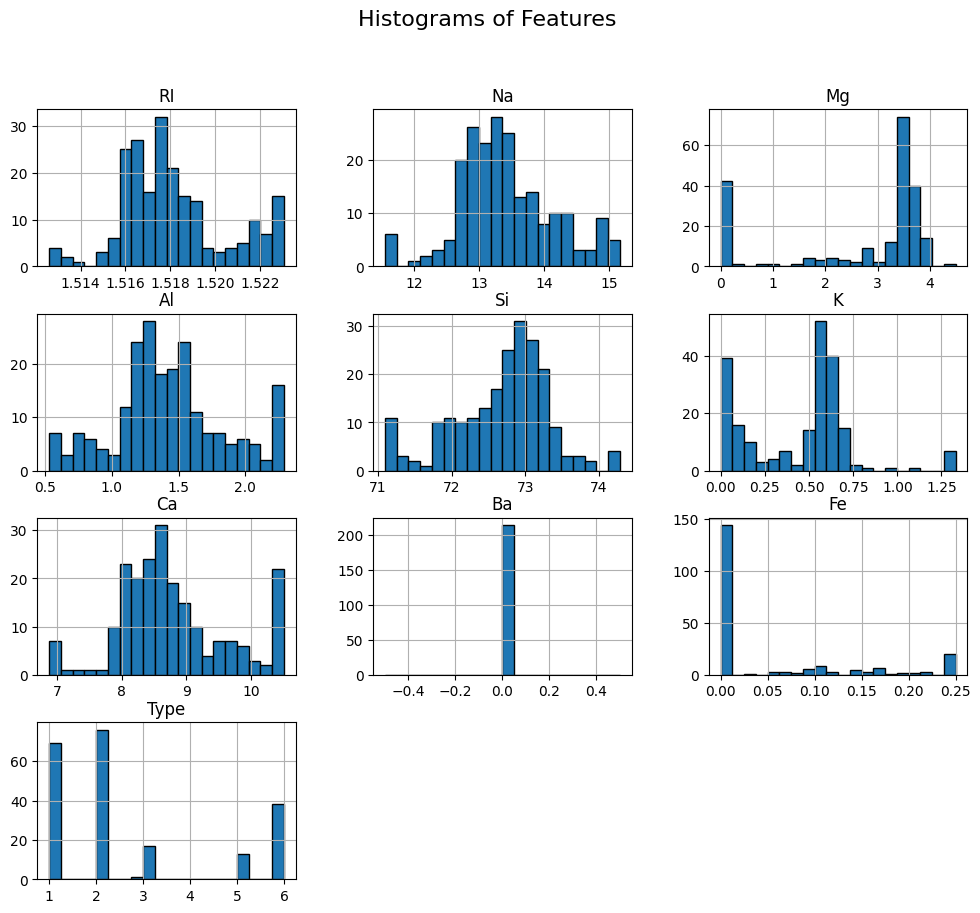

In [129]:
df.hist(figsize=(12,10), bins=20, edgecolor='black')
plt.suptitle("Histograms of Features", fontsize=16)
plt.show()


<Axes: >

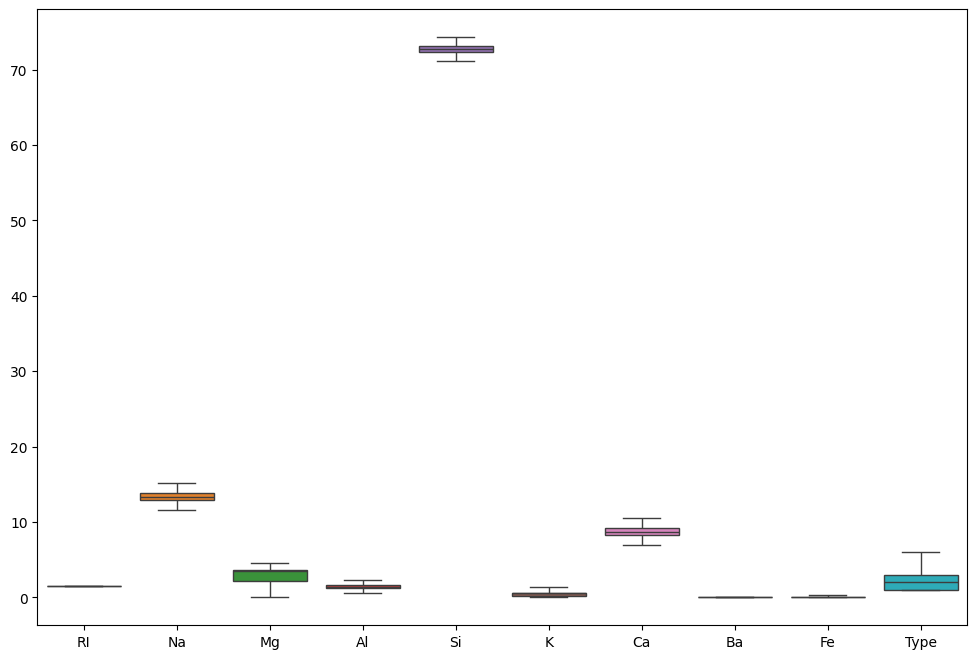

In [130]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df)

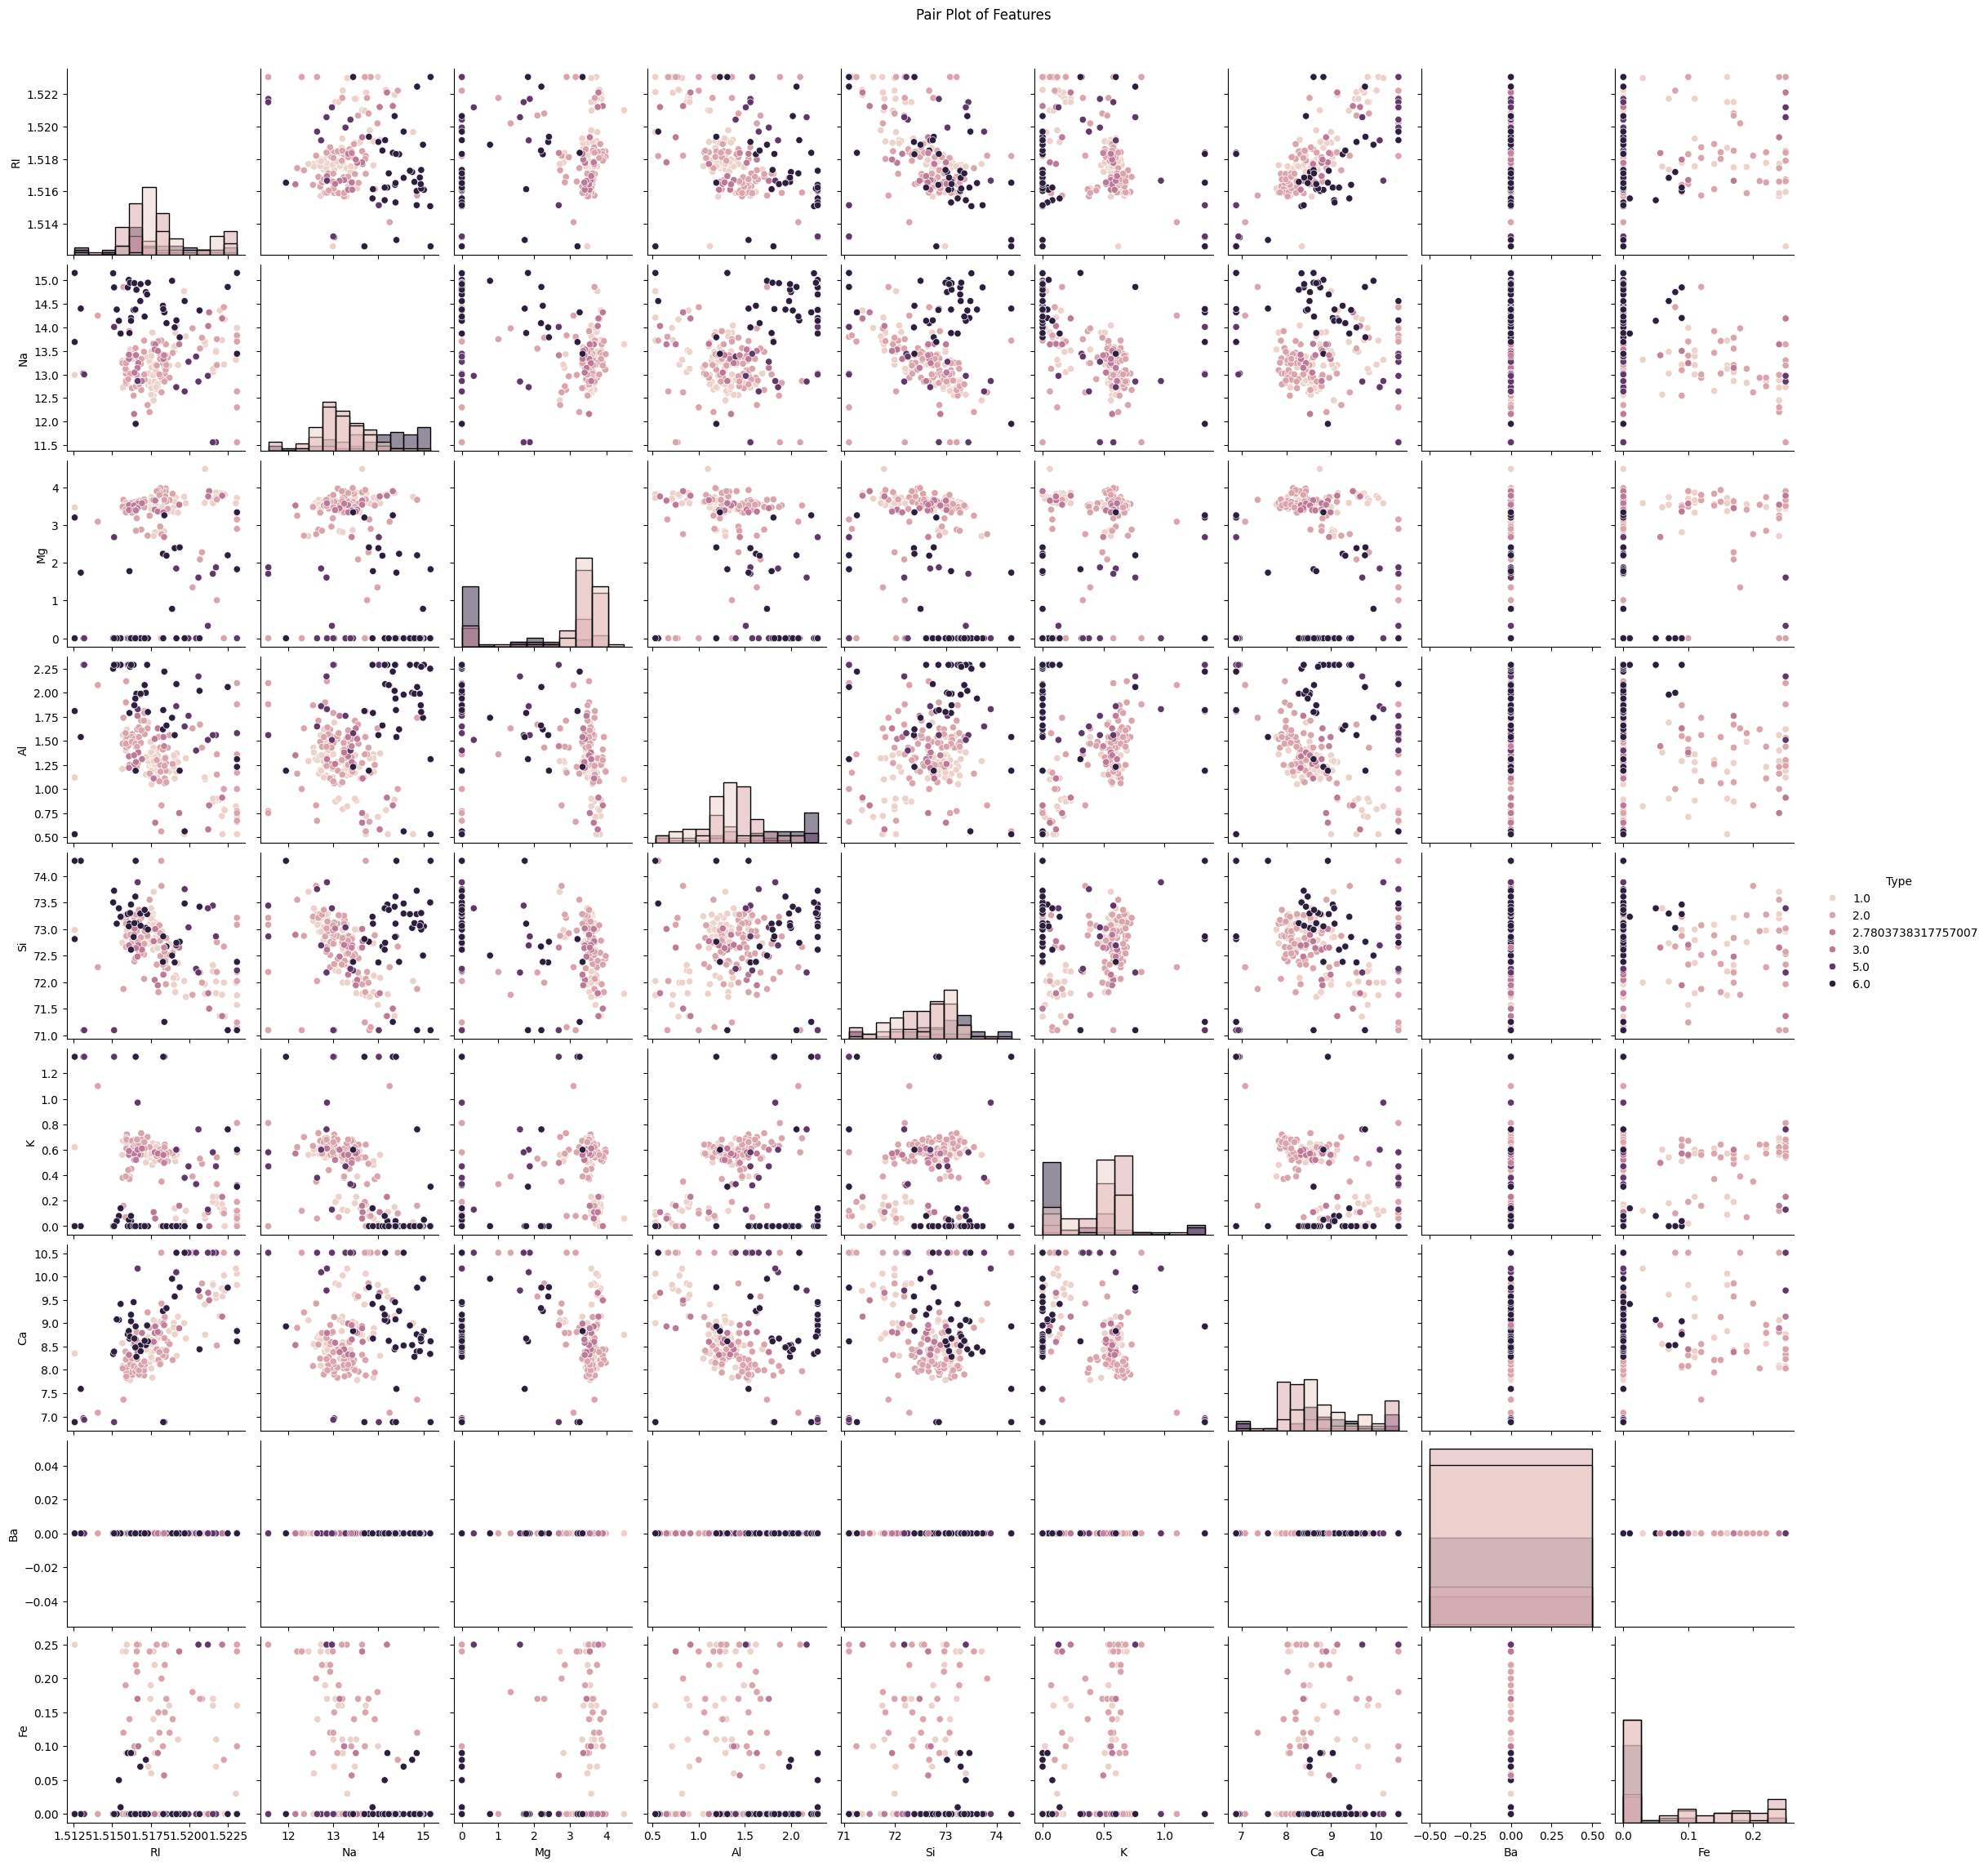

In [131]:
sns.pairplot(df, hue='Type', diag_kind='hist')
plt.suptitle("Pair Plot of Features", y=1.02)
plt.show()


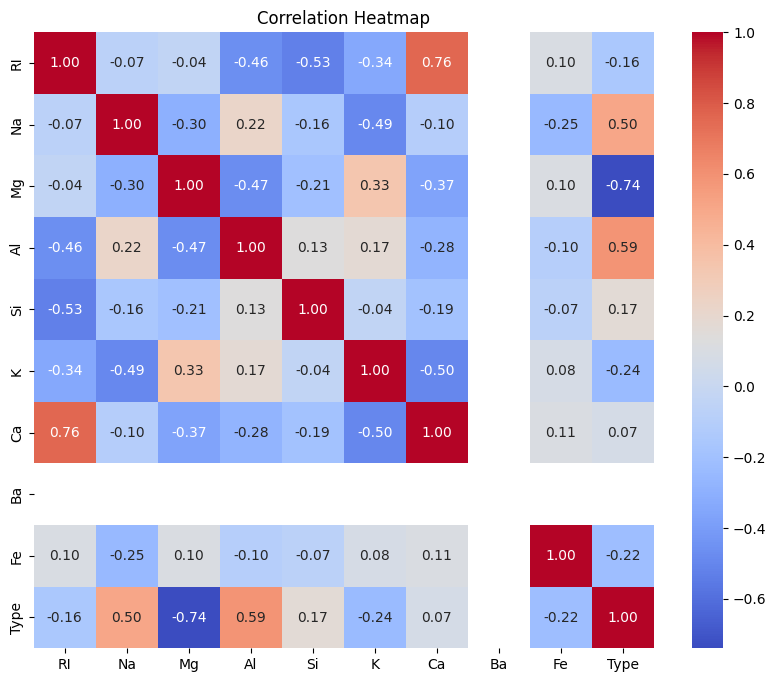

In [132]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


1.here most negative corelation  is observed between si and AI
2.there is a weak positive corelation between K and Mg them RI and Na
3.there is a very strong negative corelation between ca and Na

3.DataPreprocessing

In [133]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [134]:
targets=df[["Type"]]

In [135]:
features=df.drop(columns="Type")

In [136]:
features

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.521010,13.64000,4.490000,1.100000,71.780000,0.060000,8.750000,0.0,0.000000
1,1.517610,13.89000,3.600000,1.360000,72.730000,0.480000,7.830000,0.0,0.000000
2,1.516180,13.53000,3.550000,1.540000,72.990000,0.390000,7.780000,0.0,0.000000
3,1.517660,13.21000,3.690000,1.290000,72.610000,0.570000,8.220000,0.0,0.000000
4,1.517420,13.27000,3.620000,1.240000,73.080000,0.550000,8.070000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
209,1.516850,14.92000,0.000000,1.990000,73.060000,0.000000,8.400000,0.0,0.000000
210,1.520650,14.36000,0.000000,2.020000,73.420000,0.000000,8.440000,0.0,0.000000
211,1.516510,14.38000,0.000000,1.940000,73.610000,0.000000,8.480000,0.0,0.000000
212,1.517110,14.23000,0.000000,2.080000,73.360000,0.000000,8.620000,0.0,0.000000


In [137]:
targets

,Type
0,1.000000
1,1.000000
2,1.000000
3,1.000000
4,1.000000
...,...
209,6.000000
210,6.000000
211,6.000000
212,6.000000


In [138]:
scaler = StandardScaler()
x_scaled=scaler.fit_transform(features)

In [139]:
pd.DataFrame(x_scaled,columns=features.columns)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.221577,0.323655,1.260169,-0.775960,-1.372712,-1.257226,-0.044871,0.0,-0.622769
1,-0.227951,0.663112,0.640792,-0.155325,0.086445,0.124235,-1.120468,0.0,-0.622769
2,-0.837606,0.174295,0.605996,0.274345,0.485793,-0.171792,-1.178925,0.0,-0.622769
3,-0.206635,-0.260210,0.703426,-0.322419,-0.097870,0.420263,-0.664508,0.0,-0.622769
4,-0.308954,-0.178740,0.654711,-0.441772,0.624029,0.354479,-0.839877,0.0,-0.622769
...,...,...,...,...,...,...,...,...,...
209,-0.551964,2.061674,-1.864550,1.348522,0.593310,-1.454578,-0.454065,0.0,-0.622769
210,1.068097,1.301291,-1.864550,1.420134,1.146253,-1.454578,-0.407300,0.0,-0.622769
211,-0.696916,1.328447,-1.864550,1.229169,1.438085,-1.454578,-0.360535,0.0,-0.622769
212,-0.441117,1.124773,-1.864550,1.563357,1.054096,-1.454578,-0.196857,0.0,-0.622769


In [140]:
scales=MinMaxScaler()

In [141]:
minmax=scales.fit_transform(features)

In [142]:
pd.DataFrame(minmax,columns=features.columns)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.803606,0.578472,1.000000,0.323864,0.215125,0.045113,0.515496,0.0,0.000000
1,0.478868,0.647917,0.801782,0.471591,0.512931,0.360902,0.262052,0.0,0.000000
2,0.342287,0.547917,0.790646,0.573864,0.594436,0.293233,0.248278,0.0,0.000000
3,0.483644,0.459028,0.821826,0.431818,0.475313,0.428571,0.369490,0.0,0.000000
4,0.460721,0.475694,0.806236,0.403409,0.622649,0.413534,0.328168,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
209,0.406280,0.934028,0.000000,0.829545,0.616379,0.000000,0.419077,0.0,0.000000
210,0.769222,0.778472,0.000000,0.846591,0.729232,0.000000,0.430096,0.0,0.000000
211,0.373806,0.784028,0.000000,0.801136,0.788793,0.000000,0.441116,0.0,0.000000
212,0.431113,0.742361,0.000000,0.880682,0.710423,0.000000,0.479683,0.0,0.000000


In [143]:
targets.shape

(214, 1)

In [144]:
a=df["Type"]==0

In [145]:
a.shape

(214,)

In [146]:
b=df["Type"]==1

In [147]:
b.shape

(214,)

In [148]:
from imblearn.over_sampling import SMOTE

In [149]:
x_train,x_test,y_train,y_test=train_test_split(features,targets,test_size=0.2,random_state=2)

In [153]:
# Example: convert float classes to integers
y_train = y_train.astype(int)

In [154]:
smotes=SMOTE(random_state=50)
x_res,y_res=(smotes.fit_resample(x_train,y_train))

In [155]:
x_res

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.516180,13.530000,3.550000,1.540000,72.990000,0.390000,7.780000,0.0,0.000000
1,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.0,0.057009
2,1.517660,13.210000,3.690000,1.290000,72.610000,0.570000,8.220000,0.0,0.000000
3,1.521710,11.560000,1.880000,1.560000,72.860000,0.470000,10.508750,0.0,0.000000
4,1.517630,12.610000,3.590000,1.310000,73.290000,0.580000,8.500000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
320,1.518756,14.118554,0.000000,2.112461,72.795031,0.015723,10.385352,0.0,0.001123
321,1.518801,14.292112,0.000000,2.051333,73.388667,0.000000,8.533999,0.0,0.000000
322,1.522792,15.020738,2.000090,1.654778,71.093750,0.516867,9.138659,0.0,0.000000
323,1.516818,14.923774,0.000000,2.002579,73.059581,0.002096,8.418029,0.0,0.000000


In [156]:
y_res

,Type
0,1
1,2
2,1
3,5
4,1
...,...
320,6
321,6
322,6
323,6


In [157]:
x_res.shape

(325, 9)

In [158]:
y_res.shape

(325, 1)

<Axes: >

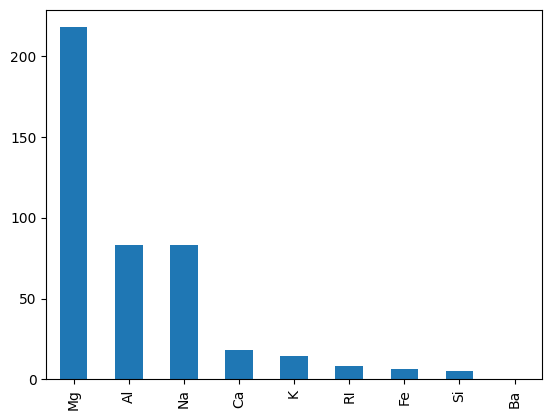

In [159]:
f_class=f_classif(x_res,y_res)
pd.Series(f_class[0],index=features.columns).sort_values(ascending=False).plot(kind="bar")

In [160]:
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.2,random_state=2)

In [161]:
print(x_res.shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(325, 9)
(260, 9)
(65, 9)
(260, 1)
(65, 1)


In [162]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(x_train, y_train)

In [163]:
rands=RandomForestClassifier(n_estimators=200,max_samples=0.9,max_features="sqrt",class_weight='balanced',bootstrap=True,random_state=42,max_depth=10)
rands.fit(x_train,y_train)
y_preds=rands.predict(x_test)
accuracy_score(y_test,y_preds)

0.9076923076923077

In [164]:
classes = classification_report(y_test,y_preds)

In [165]:
print(classes)

              precision    recall  f1-score   support

           1       0.81      1.00      0.90        13
           2       1.00      0.54      0.70        13
           3       1.00      1.00      1.00        12
           5       0.94      1.00      0.97        15
           6       0.86      1.00      0.92        12

    accuracy                           0.91        65
   macro avg       0.92      0.91      0.90        65
weighted avg       0.92      0.91      0.90        65



In [166]:
confusion_matrix(y_test,y_preds)

array([[13,  0,  0,  0,  0],
       [ 3,  7,  0,  1,  2],
       [ 0,  0, 12,  0,  0],
       [ 0,  0,  0, 15,  0],
       [ 0,  0,  0,  0, 12]])

In [167]:
params=[{"n_estimators":[100,.150,200,250,300],"max_samples":[0.6,0.7,0.8,0.9,1.0],"max_depth":[10,15,20,25,30] }]

[Text(0.3854166666666667, 0.9375, 'Mg <= 2.537\ngini = 0.798\nsamples = 151\nvalue = [52.0, 43.0, 50.038, 49.92, 39.245]\nclass = 3'),
 Text(0.15476190476190477, 0.8125, 'Na <= 13.825\ngini = 0.58\nsamples = 63\nvalue = [0.0, 10.0, 0.0, 49.92, 39.245]\nclass = 2'),
 Text(0.2700892857142857, 0.875, 'True  '),
 Text(0.13095238095238096, 0.6875, 'Na <= 12.653\ngini = 0.342\nsamples = 36\nvalue = [0.0, 10.0, 0.0, 49.92, 2.943]\nclass = 2'),
 Text(0.07142857142857142, 0.5625, 'Mg <= 0.377\ngini = 0.516\nsamples = 7\nvalue = [0.0, 7.0, 0.0, 3.12, 0.981]\nclass = 6'),
 Text(0.047619047619047616, 0.4375, 'Ca <= 9.719\ngini = 0.216\nsamples = 5\nvalue = [0.0, 7.0, 0.0, 0.0, 0.981]\nclass = 6'),
 Text(0.023809523809523808, 0.3125, 'gini = 0.0\nsamples = 1\nvalue = [0.0, 0.0, 0.0, 0.0, 0.981]\nclass = 5'),
 Text(0.07142857142857142, 0.3125, 'gini = 0.0\nsamples = 4\nvalue = [0, 7, 0, 0, 0]\nclass = 6'),
 Text(0.09523809523809523, 0.4375, 'gini = 0.0\nsamples = 2\nvalue = [0.0, 0.0, 0.0, 3.12, 0.0

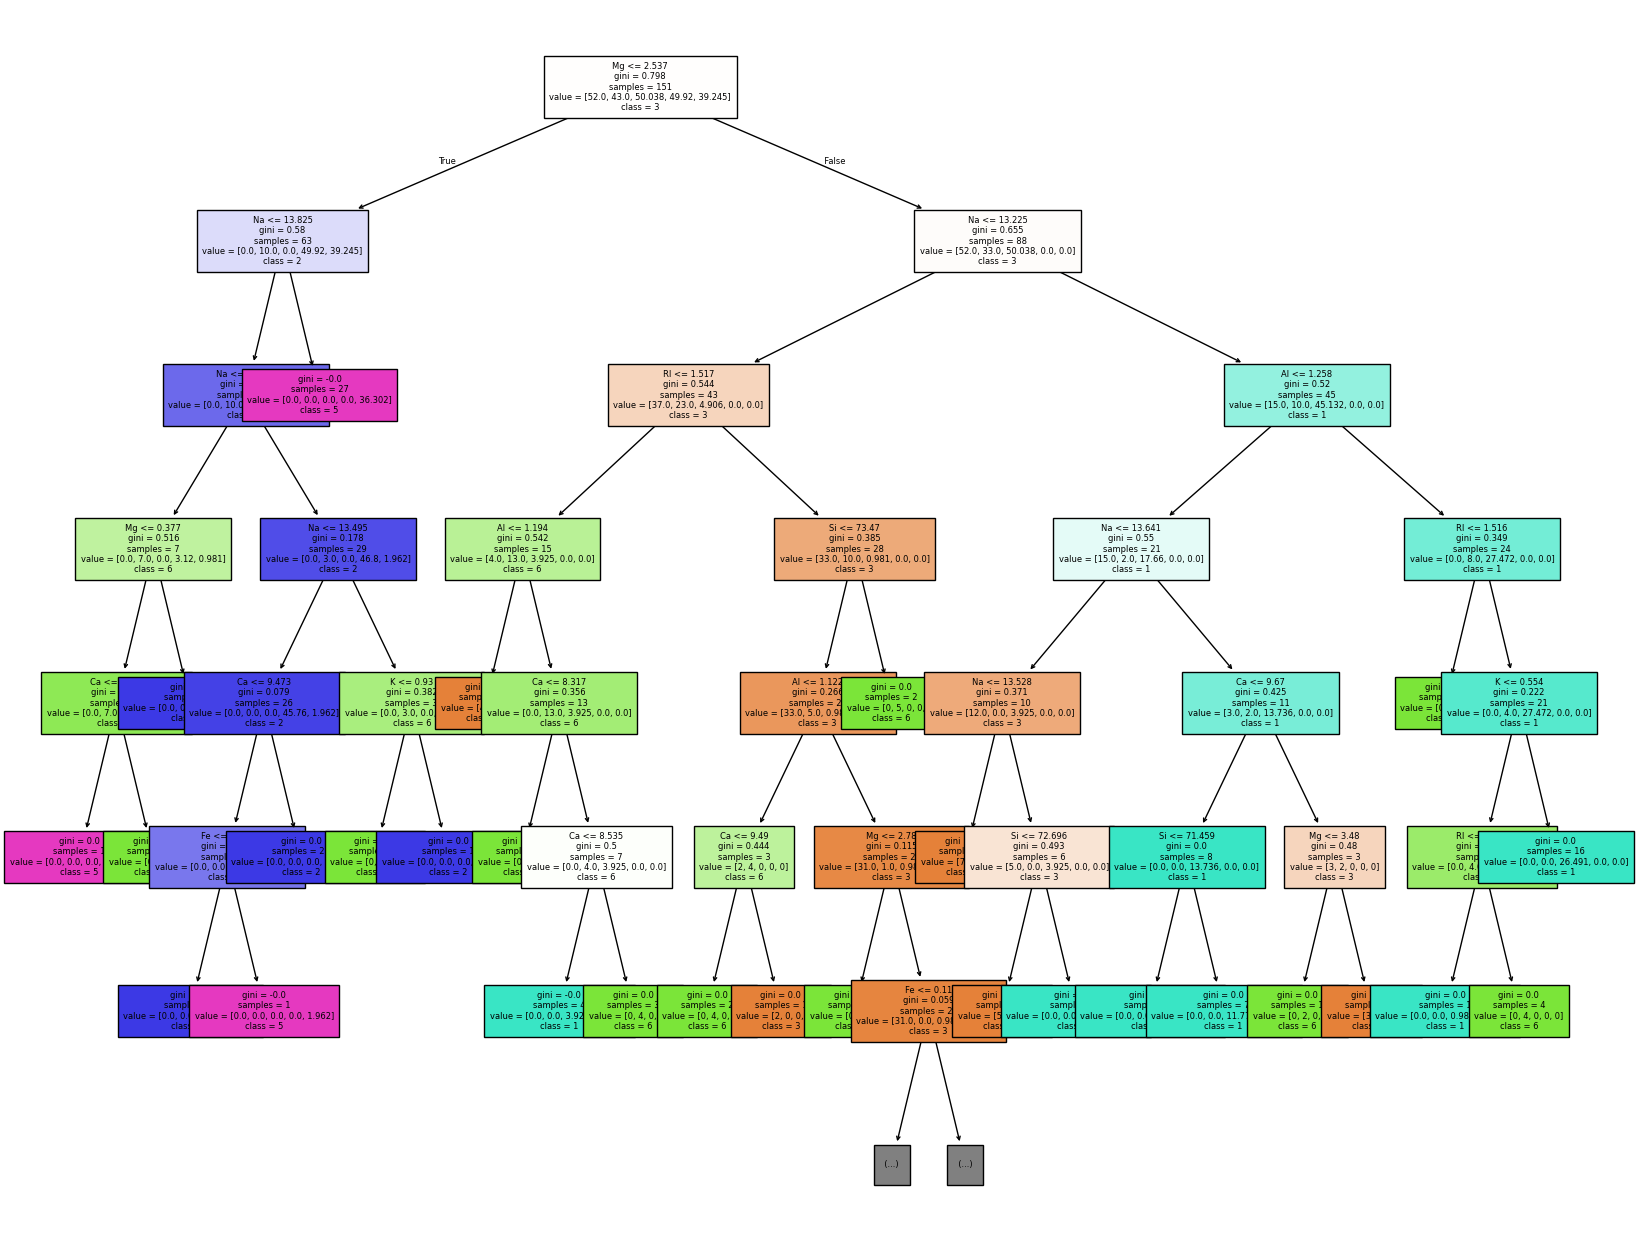

In [168]:
plt.figure(figsize=(20,16))
plot_tree(rands[0],feature_names=list(x_res),class_names=[str(cls) for cls in y_res["Type"].unique()],filled=True,max_depth=6,fontsize=6)

Hyperparameter Tunings

In [169]:
params={"n_estimators":[100,.150,200,250,300],"max_samples":[0.6,0.7,0.8,0.9,1.0],"max_depth":[10,15,20,25,30],"max_features":["auto","log2","sqrt"]}

In [170]:
grids=GridSearchCV(estimator=rands,param_grid=params,cv=5)

In [171]:
grids.fit(x_train,y_train)

,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [10, 15, ...], 'max_features': ['auto', 'log2', ...], 'max_samples': [0.6, 0.7, ...], 'n_estimators': [100, 0.15, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,300


In [172]:
grids.best_params_

{'max_depth': 10,
 'max_features': 'log2',
 'max_samples': 1.0,
 'n_estimators': 300}

In [202]:
rands=RandomForestClassifier(n_estimators=300,max_samples=1.0,max_features="log2",class_weight='balanced',bootstrap=True,random_state=42,max_depth=10)
rands.fit(x_train,y_train)
y_preds=rands.predict(x_test)
accuracy_score(y_test,y_preds)

0.9076923076923077

In [203]:
classes = classification_report(y_test,y_preds)

In [204]:
print(classes)

              precision    recall  f1-score   support

           1       0.81      1.00      0.90        13
           2       1.00      0.54      0.70        13
           3       1.00      1.00      1.00        12
           5       0.94      1.00      0.97        15
           6       0.86      1.00      0.92        12

    accuracy                           0.91        65
   macro avg       0.92      0.91      0.90        65
weighted avg       0.92      0.91      0.90        65



In [213]:
bag = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=6),n_estimators=200, random_state=42)

In [214]:
bag.fit(x_train,y_train)

,estimator,DecisionTreeC...r(max_depth=6)
,n_estimators,200
,max_samples,1.0
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,None
,random_state,42
,verbose,0


In [215]:
y_preds=bag.predict(x_test)

In [216]:
accuracy_score(y_test,y_preds)

0.9230769230769231

In [217]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           1       0.81      1.00      0.90        13
           2       1.00      0.62      0.76        13
           3       1.00      1.00      1.00        12
           5       1.00      1.00      1.00        15
           6       0.86      1.00      0.92        12

    accuracy                           0.92        65
   macro avg       0.93      0.92      0.92        65
weighted avg       0.94      0.92      0.92        65



In [218]:
gb=GradientBoostingClassifier( n_estimators=100, learning_rate=0.1, max_depth=3,random_state=42)

In [219]:
gb.fit(x_train,y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [220]:
y_preds=gb.predict(x_test)

In [221]:
accuracy_score(y_test,y_preds)

0.9384615384615385

In [222]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           1       0.87      1.00      0.93        13
           2       1.00      0.69      0.82        13
           3       1.00      1.00      1.00        12
           5       1.00      1.00      1.00        15
           6       0.86      1.00      0.92        12

    accuracy                           0.94        65
   macro avg       0.94      0.94      0.93        65
weighted avg       0.95      0.94      0.94        65



In [223]:
base_dt =DecisionTreeClassifier(max_depth=3)

In [224]:
ads=AdaBoostClassifier(estimator=base_dt,n_estimators=200,algorithm="SAMME",learning_rate=0.1,random_state=42)

In [225]:
ads

,estimator,DecisionTreeC...r(max_depth=3)
,n_estimators,200
,learning_rate,0.1
,algorithm,'SAMME'
,random_state,42
,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0


In [226]:
ads.fit(x_train,y_train)

,estimator,DecisionTreeC...r(max_depth=3)
,n_estimators,200
,learning_rate,0.1
,algorithm,'SAMME'
,random_state,42
,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0


In [227]:
y_preds=ads.predict(x_test)

In [228]:
y_preds

array([5, 3, 6, 1, 6, 5, 2, 5, 2, 3, 3, 3, 5, 5, 3, 5, 1, 3, 5, 5, 2, 1,
       1, 5, 3, 1, 1, 3, 3, 5, 2, 6, 2, 6, 2, 5, 2, 1, 6, 6, 1, 1, 2, 1,
       3, 6, 5, 5, 6, 6, 5, 6, 2, 2, 1, 6, 6, 2, 6, 6, 3, 5, 1, 3, 2])

In [229]:
accuracy_score(y_test,y_preds)

0.9538461538461539

In [230]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           1       1.00      0.92      0.96        13
           2       0.92      0.85      0.88        13
           3       1.00      1.00      1.00        12
           5       1.00      1.00      1.00        15
           6       0.86      1.00      0.92        12

    accuracy                           0.95        65
   macro avg       0.95      0.95      0.95        65
weighted avg       0.96      0.95      0.95        65

